<a href="https://colab.research.google.com/github/Abdelhakam101/Bank-Markting/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>Bank Marketing Dataset Analysis</u>

#  Steps in this Notebook :

- **[Overview](#section1)<br/>**

- **[About Data](#section2)<br/>**

- **[importing libraries](#section3)<br/>**

- **[Read Data](#section4)<br/>**

- **[Cleaning Data](#section5)<br/>**

- **[EDA](#section6)<br/>**
    1- [Univariate Analysis](#section11)<br/>
    2- [Multi & Bivariate Analysis](#section12)<br/>

- **[Recap what Im going to do with columns](#section7)<br/>**

- **[Feature Engineering](#section8)<br/>**

- **[Save Date cleaning](#section9)<br/>**

- **[Conclusion](#section10)<br/>**

<a id=section1></a>
# Overview

- **__DESCRIPTION:__
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.**

--------------
<a id=section2></a>
# About Data


## bank client data:
- __age:__(numeric)
- __job:__ type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- __marital:__ marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- __education:__ (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- __default:__ has credit in default? (categorical: 'no','yes','unknown')
- __housing:__ has housing loan? (categorical: 'no','yes','unknown')
- __loan:__ has personal loan? (categorical: 'no','yes','unknown')

## related with the last contact of the current campaign:
- __contact:__ contact communication type (categorical: 'cellular','telephone')
- __month:__ last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- __day_of_week:__ last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- __duration:__ last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## other attributes:
- __campaign:__ number of contacts performed during this campaign and for this client (numeric, includes last contact)
- __pdays:__ number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- __previous:__ number of contacts performed before this campaign and for this client (numeric)
- __poutcome:__ outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## social and economic context attributes
- __emp.var.rate:__ employment variation rate - quarterly indicator (numeric)
- __cons.price.idx:__ consumer price index - monthly indicator (numeric)
- __cons.conf.idx:__ consumer confidence index - monthly indicator (numeric)
- __euribor3m:__ euribor 3 month rate - daily indicator (numeric)
- __nr.employed:__ number of employees - quarterly indicator (numeric)

## Output variable (desired target):
- __y:__ has the client subscribed a term deposit? (binary: 'yes','no')

<a id=section3></a>
# importing libraries

In [1]:
# filter warnings
import warnings
warnings.filterwarnings('ignore')

#numerical computations and data manipulation and analysis
import numpy as np
import pandas as pd
# pd.set_option('display.max_columns',None)

#visulaization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


<a id=section4></a>
# Read Data

In [2]:
# read data of train
df = pd.read_csv("bank-additional-full.csv",sep=';')
df.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

 has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
#rows and columns
df.shape

(41188, 21)

In [4]:
# check DataType for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

----
<a id=section5></a>

# cleaning

In [5]:
# check nans
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

- __Note:__ We have no missing values

In [6]:
# check duplicates
df.duplicated().sum()

12

- __Note:__ there are 12 duplicates we will drop it

In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True , ignore_index=True)

<a id=section6></a>
# EDA

In [8]:
df['nr.employed'].value_counts()

5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [9]:
# Numerical Describtive Statistics
df.describe(exclude="O")

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860      1.734437     72.251364  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

- __Note:__ I expect there are out layers in __duration & camping__ cols

In [10]:
# categorical Describtive Statistics
df.describe(include="O")

job  marital          education default housing   loan   contact  \
count    41176    41176              41176   41176   41176  41176     41176   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10419    24921              12164   32577   21571  33938     26135   

        month day_of_week     poutcome      y  
count   41176       41176        41176  41176  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13767        8618        35551  36537

In [11]:
# Edit names of columns
df.columns = df.columns.str.replace('.','_')

In [12]:
# check target column
df.y.value_counts()

no     36537
yes     4639
Name: y, dtype: int64

- __Note:__ there is an imbalance

In [13]:
# numerical columns
num_col = df.select_dtypes(exclude="O")
num_col.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

In [14]:
# categorical columns without target
cat_col = df.select_dtypes(include="O").drop('y',axis=1)
cat_col.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [15]:
df.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [16]:
# check value counts for categrical columns
for i in cat_col :
    print(i)
    print(df[i].value_counts())
    print('-'*50)

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
--------------------------------------------------
marital
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
--------------------------------------------------
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
--------------------------------------------------
default
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
--------------------------------------------------
housing
yes        21571


__here we will do some analysis for this column__

- __Education col :__ combine between  ( 'basic.4y','basic.6y','basic.9y ) in Basic education
- __marital col :__ combine between ( 'divorced','single') in single

<a id=section11></a>
# Univariate Analysis

In [17]:
px.histogram(df , x = 'age')

In [18]:
# boxplot for age column
px.box(df , x = 'age')

- we can say there is outlayer

In [19]:
df.age.quantile([0.99,0.995,0.997,0.998,0.999])

0.990    71.0
0.995    77.0
0.997    80.0
0.998    82.0
0.999    86.0
Name: age, dtype: float64

In [20]:
# save some of index outlayers
dr = df[df.age > 80].index
dr

Int64Index([27792, 27794, 27797, 27800, 27802, 27803, 27804, 27805, 27806,
            27807,
            ...
            40702, 40704, 40706, 40715, 40736, 40938, 40953, 40957, 40974,
            40984],
           dtype='int64', length=119)

In [21]:
# drop the values i identified it
df.drop(dr,inplace=True)
df.reset_index(drop=True , inplace=True)

In [22]:
# countplot for age column
px.histogram(df , x = 'age')

In [23]:
# creat function to countplot graph
def countplot (data , col , title): # data : name of data // col : name of column // title : title for the graph
    plt.figure(figsize=(12,7))
    sns.countplot(data=data,
                 x=col,
            )
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

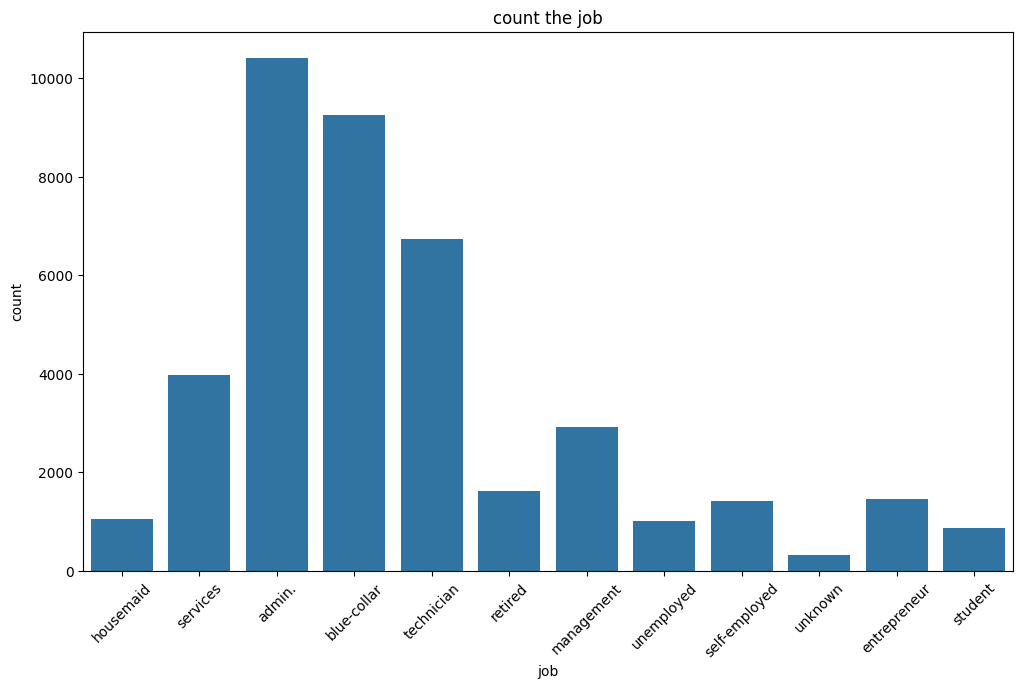

In [24]:
# call countplot function to the job col
countplot(df,'job' , 'count the job')

In [25]:
#function to  combine between ( 'divorced','single') in single
def modify_marital (row):
    if row == 'divorced':
        return 'single'
    else :
        return row

In [26]:
# apply modify_marital function
df.marital = df.marital.apply(modify_marital)

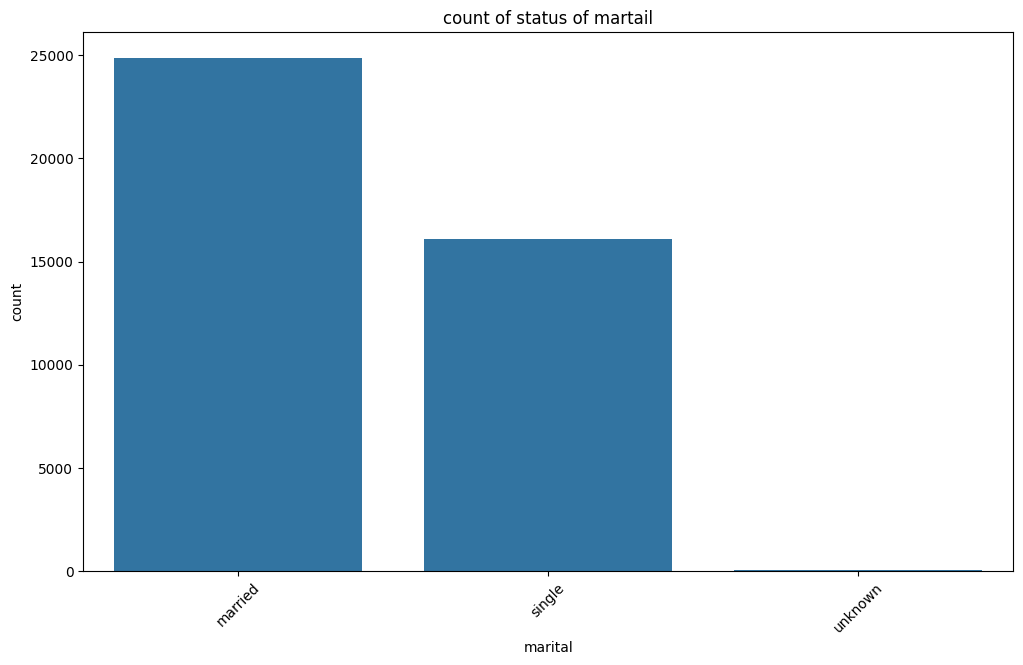

In [27]:
# call countplot function to the marital col
countplot(df , 'marital' ,'count of status of martail' )

In [28]:
# new value in marital
df.marital.value_counts()

married    24861
single     16116
unknown       80
Name: marital, dtype: int64

In [29]:
# function to combine between ( 'basic.4y','basic.6y','basic.9y ) in Basic education
def modify_education (row):
    if row in ['basic.4y','basic.6y','basic.9y']:
        return 'Basic education'
    else :
        return row

In [30]:
# apply modify_education function
df.education = df.education.apply(modify_education)

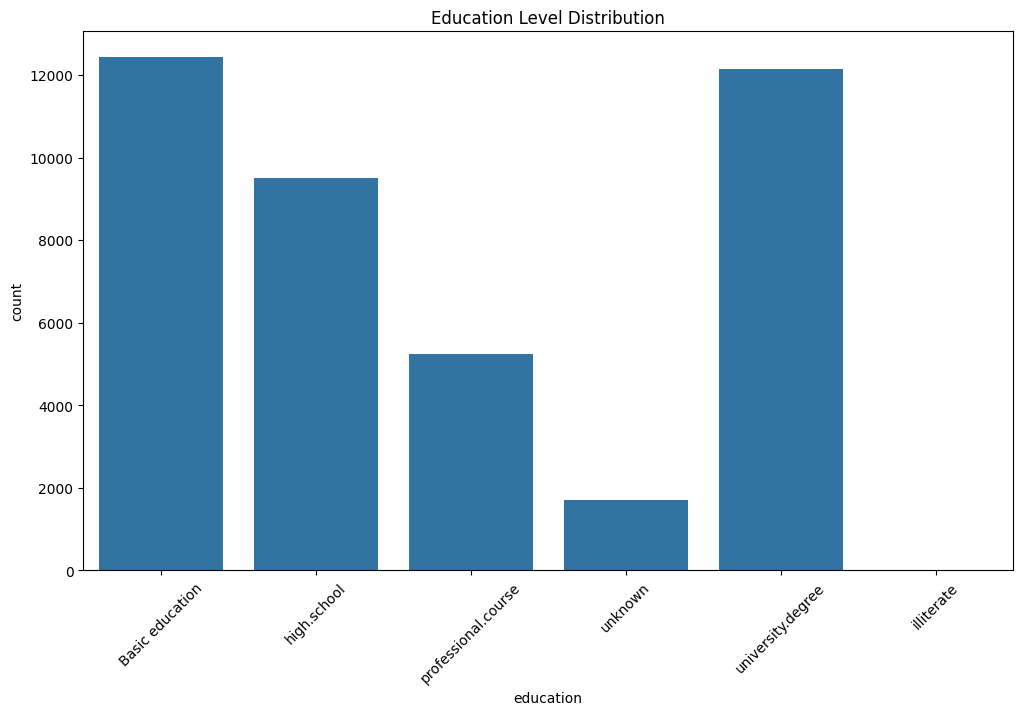

In [31]:
# call countplot function to the education col
countplot(df , 'education' , 'Education Level Distribution')

In [32]:
# new values in education
df.education.value_counts()

Basic education        12431
university.degree      12153
high.school             9505
professional.course     5233
unknown                 1717
illiterate                18
Name: education, dtype: int64

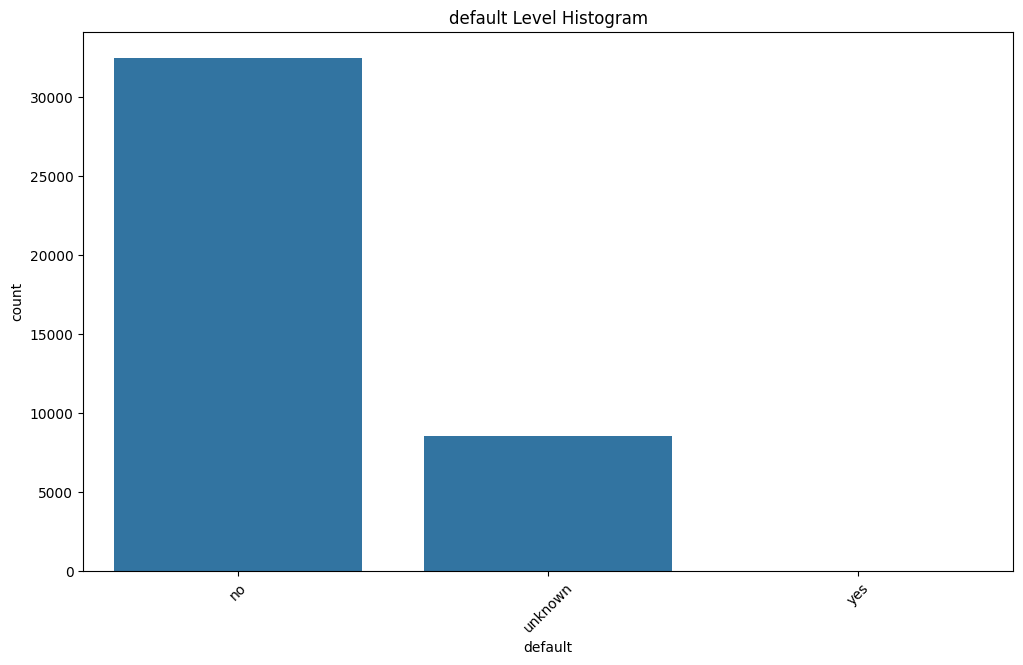

In [33]:
# call countplot function to the default col
countplot(df , 'default' ,"default Level Histogram")

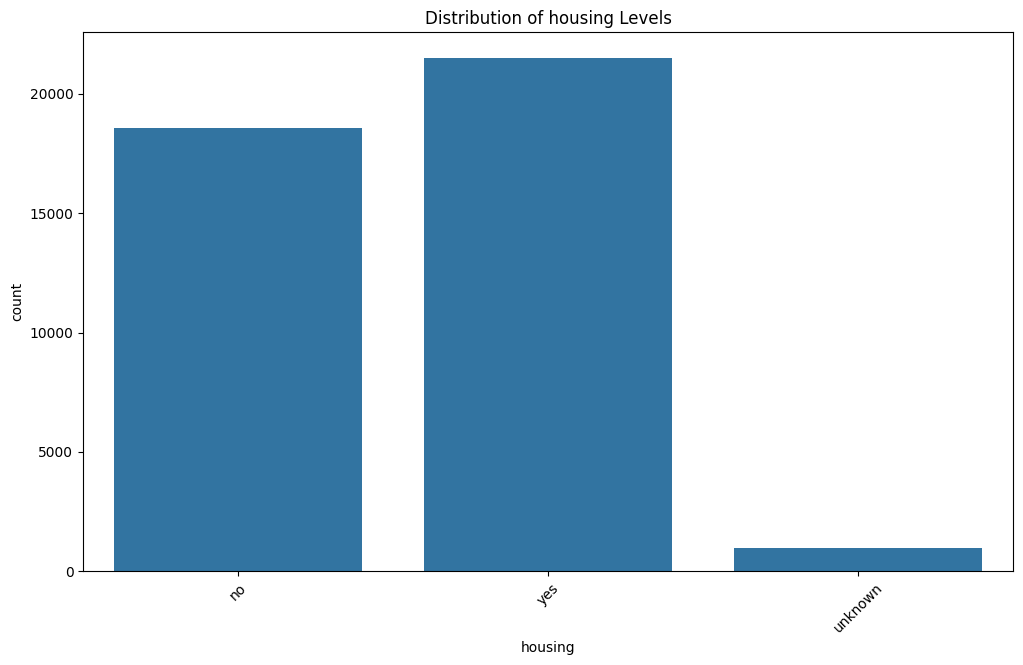

In [34]:
# call countplot function to the housing col
countplot(df , 'housing' ,"Distribution of housing Levels")

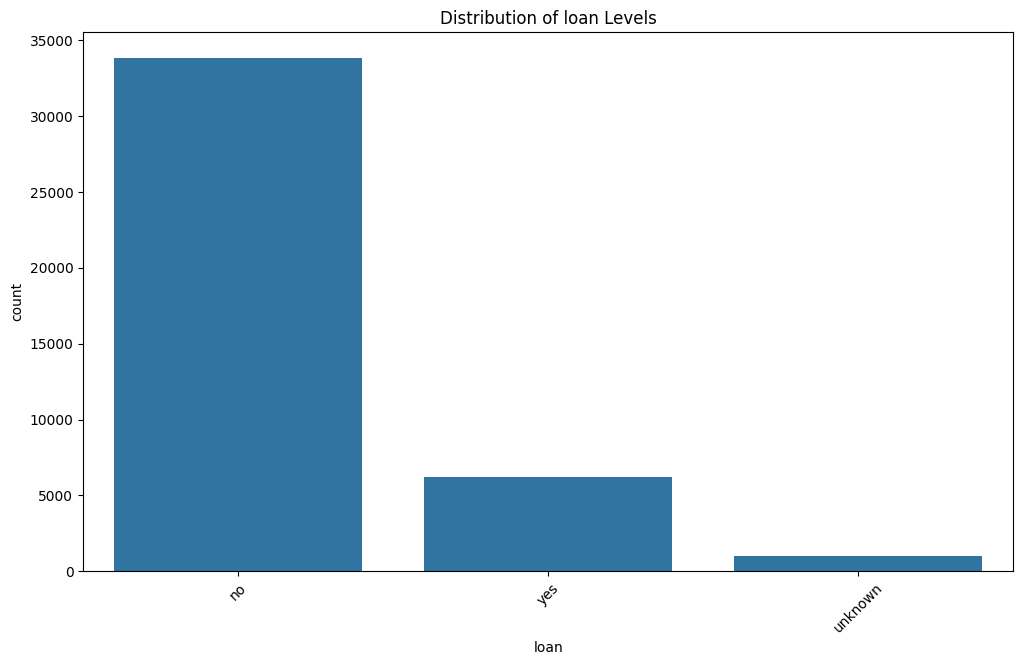

In [35]:
# call countplot function to the loan col
countplot(df , 'loan' ,"Distribution of loan Levels")

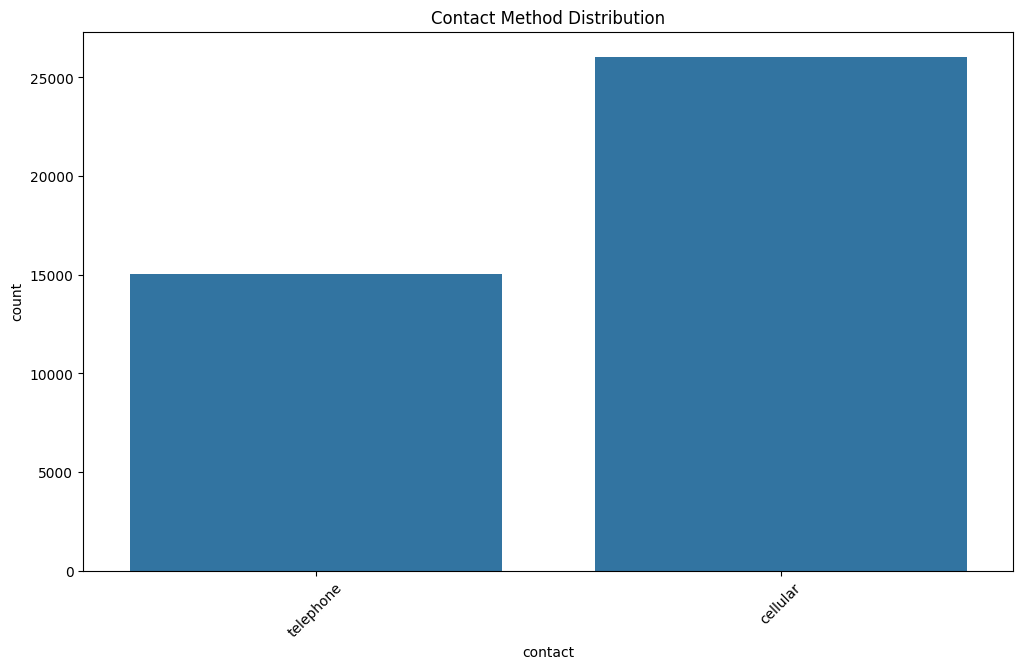

In [36]:
# call countplot function to the contact col
countplot(df , 'contact' , "Contact Method Distribution")

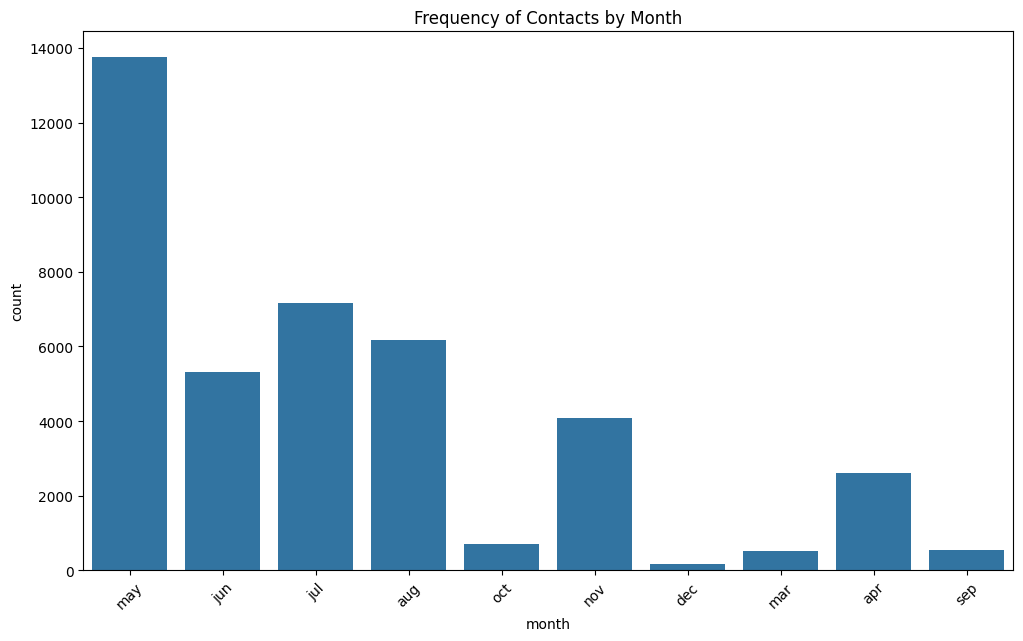

In [37]:
# call countplot function to the month col
countplot(df , 'month' , "Frequency of Contacts by Month")

In [38]:
# variable to save value counts for day_of_week to use in pie chart
dff = df['day_of_week'].value_counts()
dff

thu    8600
mon    8491
wed    8103
tue    8053
fri    7810
Name: day_of_week, dtype: int64

In [39]:
# pie chart to day_of_week col
px.pie(dff , names=dff.index
       ,values=dff.values ,
       title="Distribution of Contacts by Day of the Week")

In [40]:
# 2 figures to duration column
figures = []
figures.append(px.histogram(df , x='duration'))
figures.append(px.box(df , x='duration'))
for fig in figures:
    fig.show()

- i will try to scale this column by log

- __Important note:__ the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- __so i will  drop it__

In [41]:
# scale this column by log
px.histogram(np.log(df.duration))

- duration col convert to normal distribution

In [42]:
px.box(df ,x='campaign')

- __Note:__ there are outlayers

In [43]:
df.campaign.quantile([0.99,0.995,0.997,0.998,0.999])

0.990    14.0
0.995    19.0
0.997    22.0
0.998    25.0
0.999    29.0
Name: campaign, dtype: float64

In [44]:
df.pdays.value_counts()

999    39572
3        426
6        404
4        115
9         63
2         60
7         57
12        57
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

 - 999 means client was not previously contacted

In [45]:
# assign 0 for pdays where entry is 999 as it means there was no contact with customer
df.pdays[df.pdays == 999] = 0

In [46]:
# count plot to pdays col
px.histogram(x=df.pdays)

In [47]:
df.previous.value_counts()

0    35480
1     4538
2      738
3      211
4       66
5       18
6        5
7        1
Name: previous, dtype: int64

In [48]:
px.histogram(x=df.previous)

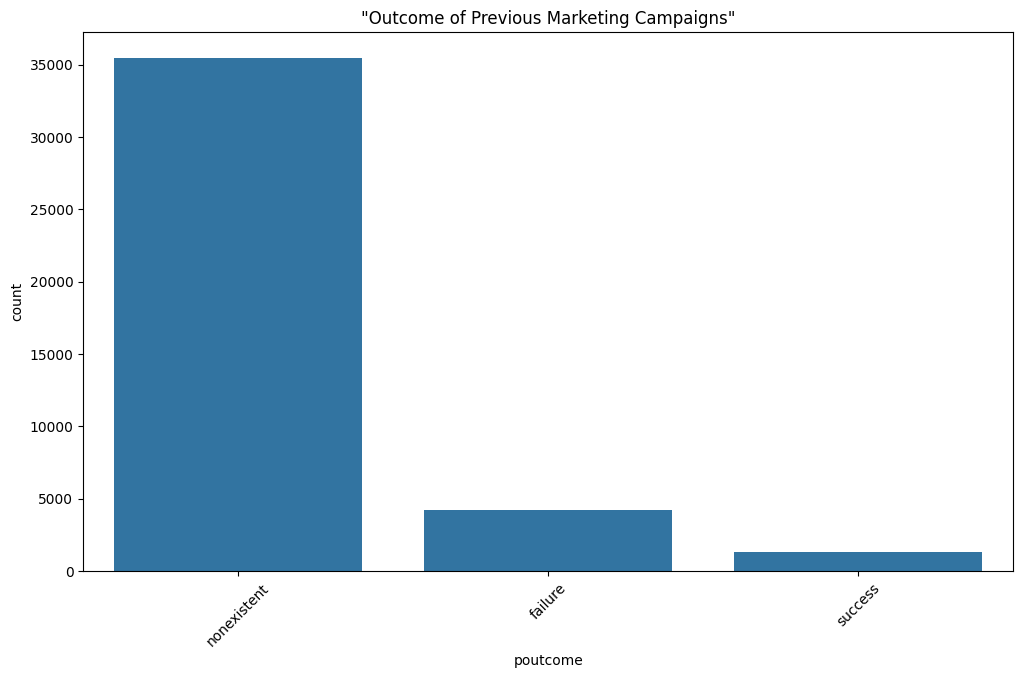

In [49]:
# call countplot function to the poutcome col
countplot(df ,'poutcome', '"Outcome of Previous Marketing Campaigns"')

In [50]:
# box plot to emp_var_rate
px.box(df , x='emp_var_rate')

- __Note:__ there is denisty form -1.8 to 1.4

In [51]:
# box plot to cons_price_idx
px.box(df , x =df.cons_price_idx)

- __Note:__ there is denisty form 93.075 to 93.994

In [52]:
# box plot to cons_conf_idx
px.box(df , x =df.cons_conf_idx)

- __Note:__ there is denisty form -42.7 to -36.4

In [53]:
# box plot to euribor3m
px.box(df , x =df.euribor3m)

In [54]:
# box plot to nr_employed
px.box(df , x='nr_employed')

<a id=section7></a>
# Recap what Im going to do with columns

**In preprocessing process i will do**

- 1 - Drop some columns i expect it not important like [duration , campagin , poutcome]
- 2- use Binary Encoder with all categorical columns
- 3- use MinMax scaler to scaling
- 4- use SMOTeTomek to handle imbalance problem

------------
<a id=section8></a>
# Feature Engineering

**In this process i will :**
-  create quarterl of year column from monthes
-  create age_group column to represent interval of ages


In [55]:
# function to creat a quarter column
def quarterl_col (row):
    if row == 'mar':
        return 'quarter1'
    elif row in ['apr','may','jun']:
        return 'quarter2'
    elif row in ['jul' , 'aug' , 'sep']:
        return 'quarter3'
    else :
        return 'quarter4'

In [56]:
df['quarter'] = df.month.apply(quarterl_col)

In [57]:
dff = df.quarter.value_counts()
dff

quarter2    21685
quarter3    13879
quarter4     4964
quarter1      529
Name: quarter, dtype: int64

In [58]:
px.pie(df , names=dff.index ,
       values=dff.values ,
      title= "Proportion of Data by Quarter")

- quarter 2 has the most values

In [59]:
# creat age_group column
df['age_group'] = pd.cut(x=df.age ,
                         bins=[15, 30, 40, 50, 60, 81],
                         labels = ['15-29', '30-39', '40-49', '50-59', '60-80'],
                          right=False,

                        )
df[['age_group']]

age_group
0         50-59
1         50-59
2         30-39
3         40-49
4         50-59
...         ...
41052     60-80
41053     40-49
41054     50-59
41055     40-49
41056     60-80

[41057 rows x 1 columns]

In [60]:
df.age_group.value_counts()

30-39    16933
40-49    10523
50-59     6861
15-29     5667
60-80     1073
Name: age_group, dtype: int64

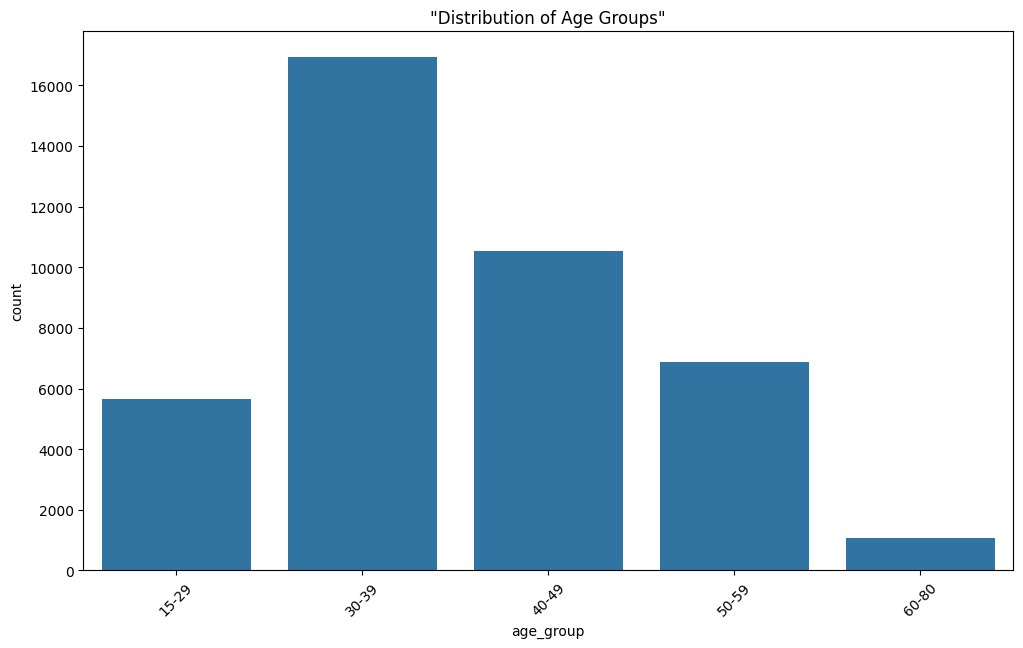

In [61]:
countplot(df , 'age_group','"Distribution of Age Groups"')

- interval from 30 to 39 has the most values

<a id=section12></a>
# Multi & Bivariate Analysis

In [62]:
# heatmap to explain correlation between the numerical columns
fig = px.imshow(df.corr().round(3),text_auto=True,color_continuous_scale='Blues')
fig.show()

In [63]:
# from dython.nominal import associations
# x = associations(df, figsize=(20, 10))

- __Note:__ there is high correlation between __euribor3m__ and  __nr_employed__
- __Note:__ there is high correlation between __euribor3m__ and __emp_var_rate__
- __Note:__ there is high correlation between __emp_var_rate__ and __nr_employed__
- __Note:__ there is high correlation between __emp_var_rate__ and __cons_price_idx__
----------------

In [64]:
# scatter plot to show the correlation between euribor3m and nr_employed
px.scatter(df, y='euribor3m' , x='nr_employed',color='y')

- we can say there is positive corrletion

In [65]:
# scatter plot to show the correlation between euribor3m and emp_var_rate
px.scatter(df, y='euribor3m' , x='emp_var_rate')

- we can say there is positive corrletion

In [66]:
# group for each month with mean to cons_price_idx
dff = df.groupby('month')['cons_price_idx'].mean().reset_index()
dff

month  cons_price_idx
0   apr       93.117802
1   aug       93.311934
2   dec       92.715457
3   jul       93.894841
4   jun       94.245546
5   mar       93.102520
6   may       93.529071
7   nov       93.202023
8   oct       93.181960
9   sep       93.332018

In [67]:
# line plot to month column with cons_price_idx
px.line(dff , x='month' , y='cons_price_idx')

- the best month is __dec__ because it has little value with cons_price_idx

In [68]:
# create data frame to line plot between month column and cons_conf_idx
dff = df.groupby('month',as_index=False)['cons_conf_idx'].mean()
dff

month  cons_conf_idx
0   apr     -46.306197
1   aug     -35.600470
2   dec     -33.737143
3   jul     -42.372944
4   jun     -41.580768
5   mar     -42.500567
6   may     -40.576884
7   nov     -41.260337
8   oct     -34.650215
9   sep     -33.832000

In [69]:
# line plot to month column with cons_conf_idx
px.line(dff , x='month' , y='cons_conf_idx')

- actully __dec__ is the higher cons_conf_idx because it has little value with cons_price_idx

In [70]:
# function for histogram with color by target column
# (name of data , value of x_axis , valu of y_axes,hue , name of xaxes , name of y_axis , name for this histograme)
def histogram(data , x , y , color ,x_axes,y_axes , title,barnorm=None):
    fig = px.histogram(data_frame=data , x=x, y=y,
                 color=color,
                 barmode='group',
                barnorm=barnorm,
                 text_auto=True ,
                title=title)
    fig.update_layout(width=1000, height=600)
    fig.update_yaxes(title_text=y_axes)
    fig.update_xaxes(title_text=x_axes)
    fig.update_layout(title= {'y': 0.9, 'x': 0.5,'xanchor': 'center', 'yanchor': 'top'},
                     xaxis={'categoryorder':'total descending'})
    fig.show()

# Does age influence subscription to a term deposit?

In [71]:
# call histogram function to the age_group col colored by target
histogram(data = df
         ,x= df.age_group, y=None
         ,color='y'
         ,x_axes='age_group' ,
         y_axes='count',
         title="Histogram for Age Group with Color by Target Column" )

In [72]:
histogram(data = df
         ,x= df.age_group, y=None
         ,color='y' ,
         barnorm='percent'
         ,x_axes='age_group' ,
         y_axes='percentage',
         title="Histogram for Age Group with Color by Target Column" )

- __Note:__ i expect you may be care about __[15-29 , 30-39 ]__ intervals

# What is the distribution of job types among clients who subscribed to a term deposit?

In [73]:
df.groupby(['job','y'])[['y']].count().rename(columns = {'y':'count'}).reset_index()

job    y  count
0          admin.   no   9068
1          admin.  yes   1351
2     blue-collar   no   8615
3     blue-collar  yes    638
4    entrepreneur   no   1332
5    entrepreneur  yes    124
6       housemaid   no    949
7       housemaid  yes     99
8      management   no   2596
9      management  yes    328
10        retired   no   1229
11        retired  yes    384
12  self-employed   no   1272
13  self-employed  yes    149
14       services   no   3644
15       services  yes    323
16        student   no    600
17        student  yes    275
18     technician   no   6009
19     technician  yes    730
20     unemployed   no    870
21     unemployed  yes    144
22        unknown   no    293
23        unknown  yes     35

In [74]:
# call histogram function to the job col colored by target
histogram(data = df
         ,x= df.job, y=None
         ,color='y'
         ,x_axes='job' ,
         y_axes='count',
         title="Histogram for job with Color by Target Column" )

In [75]:
histogram(data = df
         ,x= df.job, y=None
         ,color='y' ,
        barnorm='percent'
         ,x_axes='job' ,
         y_axes='percentage',
         title="Histogram for job with Color by Target Column" )

- __Note:__ Admin are the most job subscribed to a term deposit

# What is the distribution of target across different levels of education?

In [76]:
df.groupby(['education','y'])[['y']].count()

y
education           y         
Basic education     no   11382
                    yes   1049
high.school         no    8476
                    yes   1029
illiterate          no      14
                    yes      4
professional.course no    4642
                    yes    591
university.degree   no   10487
                    yes   1666
unknown             no    1476
                    yes    241

In [77]:
# call histogram function to the education col colored by target
histogram(data = df
         ,x= df.education, y=None
         ,color='y'
         ,x_axes='education' ,
         y_axes='count',
         title="Histogram for education with Color by Target Column" )

- __care about Among individuals with a university degree__

# What is the distribution of target across marital?

In [78]:
histogram(data = df
         ,x= df.marital, y=None
         ,color='y'
         ,x_axes='marital' ,
         y_axes='count',
         title="Histogram for marital with Color by Target Column" )

In [79]:
px.sunburst(df , path=['marital' , 'y'])

- __i expect marital status don't affect on the target__
-----------------------

# What is the distribution of subscription term deposit among individuals based on their credit default status?

In [80]:
px.sunburst(df , path=['default' , 'y'])

In [81]:
histogram(data = df
         ,x= df.default, y=None
         ,color='y' ,
         barnorm='percent',
         x_axes='default' ,
         y_axes='percentage',
         title="Histogram for default with Color by Target Column" )

- __majority for clients not have credit__

# Is there a relationship between housing loan status and subscription to a term deposit ?

In [82]:
histogram(data = df
         ,x= df.housing, y=None
         ,color='y' ,
         barnorm='percent'
         ,x_axes='housing' ,
         y_axes='percentage',
         title="Histogram for housing with Color by Target Column" )

- if you have housing loan or not that's not affect on target

# Is there a relationship between  personal loan status and subscription to a term deposit

In [83]:
histogram(data = df
         ,x= df.loan, y=None
         ,color='y' ,
         barnorm='percent'
         ,x_axes='loan' ,
         y_axes='percentage',
         title="Histogram for housing with Color by Target Column" )

- if you have  personal loan or not that's not affect on target

# What is the distribution of target across contact status?

In [84]:
histogram(data = df
         ,x= df.contact, y=None
         ,color='y' ,
         barnorm='percent'
         ,x_axes='contact' ,
         y_axes='percentage',
         title="Histogram for contact with Color by Target Column" )

- __I think cellular campaign better than telephone campaign__

# How does the number of contacts performed before this campaign relate to the subscription to a term deposit?



In [85]:
histogram(data = df
         ,x= df.previous, y=None
         ,color='y' ,
         barnorm='percent'
         ,x_axes='previous' ,
         y_axes='percentage',
         title="Histogram for previous with Color by Target Column" )

- There are those among the people you spoke with at the previous campaign they agreed now .
--------------

<a id=section9></a>
# save Date cleaning

In [86]:
df.to_csv('clean data.csv',index=False)

----------------------
<a id=section10></a>
# conclusion

**my recommendation to improve this business target or to gain customers subscribers do:**

- You may be care about __[15-29 , 30-39 ]__ intervals
- Concentrate with the people who work as a Admin
- Care about Among individuals with a university degree
- I think cellular campaign better than telephone campaign
- contacting the customers who have been in contact with them but have not signed up for bank services in previous campaigns

**My analysis shows that some columns don't have the effect on the target such as:**

- marital status don't affect on the target
- if individual has housing loan or not that's not affect on target
- personal loan status not affect on target
